<a href="https://colab.research.google.com/github/atheistsoldier/TDoC-Stonksmaster/blob/task5/atheistsoldier/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from numpy import arange,set_printoptions
from matplotlib import pyplot as plt
from pandas import read_csv,set_option
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import time 
import datetime 
import sys

In [26]:
import urllib.request as request
import json
with request.urlopen('https://sandbox.iexapis.com/stable/stock/twtr/chart/5y?token=Tsk_1c108c2cad3548359f9590ed5343edd9') as response:
  if response.getcode() == 200:
    source = response.read()
    data = json.loads(source)
  else:
    print('An error occurred while attempting to retrieve data from the API.')

In [27]:
df=pd.read_json('https://sandbox.iexapis.com/stable/stock/twtr/chart/5y?token=Tsk_1c108c2cad3548359f9590ed5343edd9')
df=df.dropna()
df

,date,uClose,uOpen,uHigh,uLow,uVolume,close,open,high,low,volume,currency,change,changePercent,label,changeOverTime
0,2015-10-09,31.38,31.90,32.84,31.47,28107233,31.99,31.60,32.42,31.65,28485657,,0.00,0.0000,"Oct 9, 15",0.000000
1,2015-10-12,29.37,31.40,30.92,28.80,31838272,29.27,30.90,31.81,29.50,31826207,,-2.10,-6.9080,"Oct 12, 15",-0.068519
2,2015-10-13,29.99,30.62,31.08,29.17,46721128,30.03,30.75,32.10,29.96,46982143,,0.31,1.1120,"Oct 13, 15",-0.059120
3,2015-10-14,29.71,30.57,30.16,28.89,28122024,29.71,29.61,30.11,29.47,28155678,,0.32,1.1396,"Oct 14, 15",-0.049680
4,2015-10-15,30.10,29.83,31.31,29.55,16058811,29.73,30.81,30.71,29.65,16070881,,0.34,1.1271,"Oct 15, 15",-0.038014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-10-02,47.10,45.76,48.92,46.75,14020865,47.25,46.12,48.84,45.51,14120726,,-0.60,-1.2510,"Oct 2, 20",0.517151
1255,2020-10-05,48.63,47.23,49.30,46.50,11550940,48.56,47.18,49.60,46.42,11587812,,1.23,2.6331,"Oct 5, 20",0.539321
1256,2020-10-06,46.80,48.23,49.84,46.54,15817659,47.00,49.60,49.26,46.15,15830221,,-1.78,-3.6693,"Oct 6, 20",0.480190
1257,2020-10-07,47.39,48.01,48.70,46.22,20054970,47.81,47.14,46.90,46.85,19900200,,0.27,0.6115,"Oct 7, 20",0.509793


In [28]:
adjusted_df=df.loc[:,["date","open"]]
na=[]
for i in adjusted_df.date:
  timestamp = datetime.datetime.timestamp(i)
  na.append(timestamp)
ar=np.array(na)
adjusted_df['timestamp']=ar
adjusted_df

,date,open,timestamp
0,2015-10-09,31.60,1.444349e+09
1,2015-10-12,30.90,1.444608e+09
2,2015-10-13,30.75,1.444694e+09
3,2015-10-14,29.61,1.444781e+09
4,2015-10-15,30.81,1.444867e+09
...,...,...,...
1254,2020-10-02,46.12,1.601597e+09
1255,2020-10-05,47.18,1.601856e+09
1256,2020-10-06,49.60,1.601942e+09
1257,2020-10-07,47.14,1.602029e+09


In [29]:
dataset=adjusted_df.values

In [30]:
Y=dataset[:,-2]
X=dataset[:,-1]

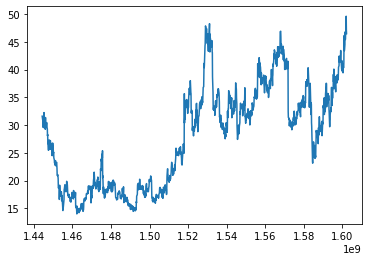

In [31]:
plt.plot(X,Y)